In [1]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#read
data=pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#pre-process
data.dropna(inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


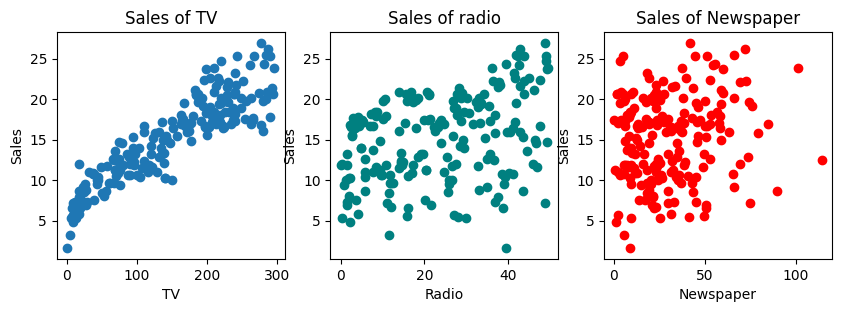

In [5]:
#plot for first time
graph = plt.figure(figsize=(10,10))

graph.add_subplot(3,3,1)
plt.scatter(data['TV'],data['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title("Sales of TV")

graph.add_subplot(3,3,2)
plt.scatter(data['Radio'],data['Sales'], c='teal')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title("Sales of radio")

graph.add_subplot(3,3,3)
plt.scatter(data['Newspaper'],data['Sales'], c='red')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title("Sales of Newspaper")
plt.show()


In [7]:
#LinReg function
def LinReg(x,y):
    x_train, x_test, y_train, y_test=train_test_split(data[x], data[y], test_size=0.3)
    x_train=x_train.to_numpy().reshape(-1,1)
    y_train=y_train.to_numpy().reshape(-1,1)
    x_test=x_test.to_numpy().reshape(-1,1)
    y_test=y_test.to_numpy().reshape(-1,1)
    
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    
    print("Coefficient ={}, Intercept={}".format(lr.coef_[0][0], lr.intercept_[0]))
    print("Linear regression line of {} vs {} is Y= {:.3} + {:.2}X".format(x,y,lr.intercept_[0],lr.coef_[0][0]))
    
    y_pred=lr.predict(x_test)
    rmse= np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("RMSE = {}, MSE= {}, MAE = {}".format(rmse, mse,mae))
    
    plt.scatter(x_train, y_train)
    plt.scatter(x_test, y_test)
    plt.title(x +" vs "+ y)
    plt.xlabel("money spent on "+x)
    plt.ylabel(y)
    plt.plot(x_test, y_pred, c='gold')

    
    

Coefficient =0.05744323792529543, Intercept=6.5127549683740344
Linear regression line of TV vs Sales is Y= 6.51 + 0.057X
RMSE = 2.3363701497666267, MSE= 5.458625476720529, MAE = 1.909473690007555
Coefficient =0.12750640576997105, Intercept=12.455857626360677
Linear regression line of Radio vs Sales is Y= 12.5 + 0.13X
RMSE = 5.666566646363185, MSE= 32.10997755767571, MAE = 4.882824537597576
Coefficient =0.012103322327965712, Intercept=14.525082300430794
Linear regression line of Newspaper vs Sales is Y= 14.5 + 0.012X
RMSE = 5.814995588019908, MSE= 33.81417368869099, MAE = 4.826992296362183


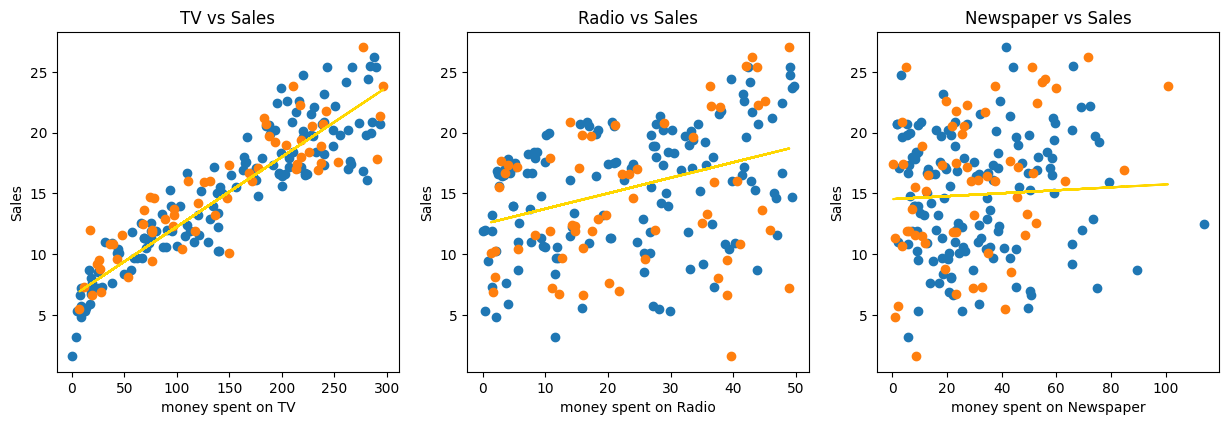

In [12]:
#sheet 
sheet= plt.figure(figsize=[15,15])

sheet.add_subplot(3,3,1)
LinReg('TV', 'Sales')

sheet.add_subplot(3,3,2)
LinReg('Radio', 'Sales')

sheet.add_subplot(3,3,3)
LinReg('Newspaper', 'Sales')
